## Feature Engineering & EDA PetAdoption Kaggle ##



### imports

In [1]:
import numpy as np 
import pandas as pd
import os
%matplotlib inline 
import matplotlib.pyplot as plt  
import time

import seaborn as sns


# Machine Learning
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
import xgboost as xgb


In [2]:
train_Df = pd.read_csv("D:/Muthu/DSDJ/Kaggle/01_PetFinder/all DS/train/train.csv")
test_Df = pd.read_csv("D:/Muthu/DSDJ/Kaggle/01_PetFinder/all DS/Test/test.csv")

#train_Df = pd.read_csv('../input/train/train.csv')
#test_Df = pd.read_csv('../input/train/test.csv")

breed_labels = pd.read_csv('D:/Muthu/DSDJ/Kaggle/01_PetFinder/all DS/breed_labels.csv')
color_labels = pd.read_csv('D:/Muthu/DSDJ/Kaggle/01_PetFinder/all DS/color_labels.csv')
state_labels = pd.read_csv('D:/Muthu/DSDJ/Kaggle/01_PetFinder/all DS/state_labels.csv')

In [3]:
print('Train shape =',train_Df.shape)
print('Testshape =',test_Df.shape)

Train shape = (14993, 24)
Testshape = (3948, 23)


In [4]:
print('datatype Train set')
train_Df.dtypes

datatype Train set


Type               int64
Name              object
Age                int64
Breed1             int64
Breed2             int64
Gender             int64
Color1             int64
Color2             int64
Color3             int64
MaturitySize       int64
FurLength          int64
Vaccinated         int64
Dewormed           int64
Sterilized         int64
Health             int64
Quantity           int64
Fee                int64
State              int64
RescuerID         object
VideoAmt           int64
Description       object
PetID             object
PhotoAmt         float64
AdoptionSpeed      int64
dtype: object

In [5]:
train_Df.head(5)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


In [6]:
#breed_labels.shape
breed_labels.tail(5)#(307, 3)

,BreedID,Type,BreedName
302,302,2,Torbie
303,303,2,Tortoiseshell
304,304,2,Turkish Angora
305,305,2,Turkish Van
306,306,2,Tuxedo


In [7]:
color_labels.shape
color_labels.head(6) #6 unique colors

,ColorID,ColorName
0,1,Black
1,2,Brown
2,3,Golden
3,4,Yellow
4,5,Cream
5,6,Gray


In [8]:
#state_labels.shape
#state_labels.head(15) #15 states

In [9]:
train_Df.head(2)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0


In [10]:
train_Df.describe
train_Df.isnull().sum() / len(train_Df)

Type             0.000000
Name             0.083839
Age              0.000000
Breed1           0.000000
Breed2           0.000000
Gender           0.000000
Color1           0.000000
Color2           0.000000
Color3           0.000000
MaturitySize     0.000000
FurLength        0.000000
Vaccinated       0.000000
Dewormed         0.000000
Sterilized       0.000000
Health           0.000000
Quantity         0.000000
Fee              0.000000
State            0.000000
RescuerID        0.000000
VideoAmt         0.000000
Description      0.000800
PetID            0.000000
PhotoAmt         0.000000
AdoptionSpeed    0.000000
dtype: float64

In [11]:
train_Df.Age.describe()

count    14993.000000
mean        10.452078
std         18.155790
min          0.000000
25%          2.000000
50%          3.000000
75%         12.000000
max        255.000000
Name: Age, dtype: float64

In [12]:
drop = ['Name', 'Breed1','Breed2','Color1','Color2','Color3', 'RescuerID', 'PetID', 'Description','State']
train = train_Df.drop(drop, axis = 1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017778715B70>,
      dtype=object)

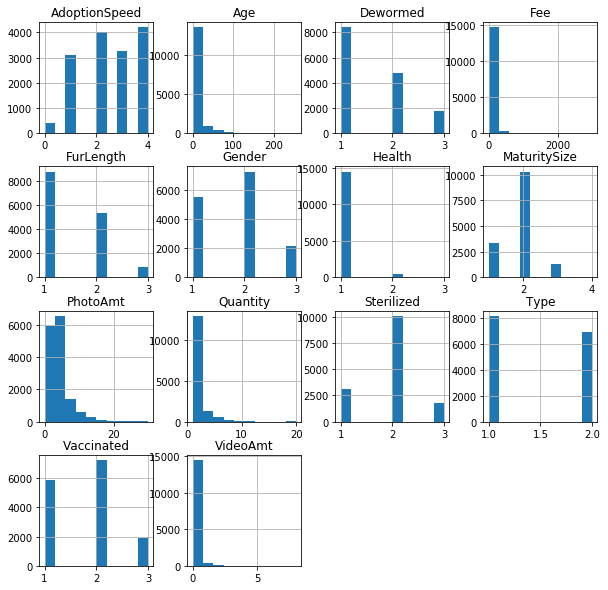

In [13]:
train.hist(figsize=(10,10))

C:\Users\mvaithianathan\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


'A factorplot is a categorical plot separates plots by classes in the given category.'

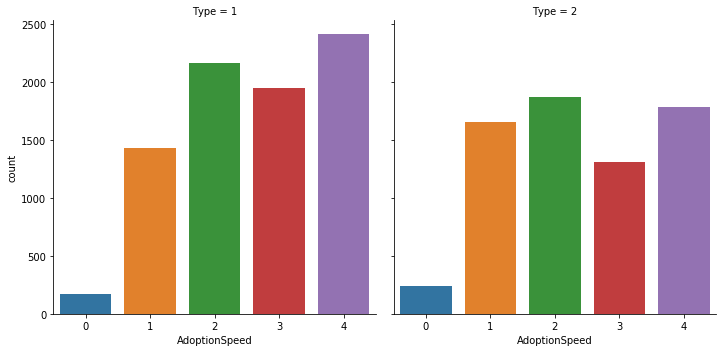

In [14]:
sns.factorplot(x='AdoptionSpeed', col='Type', kind='count', data=train)
'''A factorplot is a categorical plot separates plots by classes in the given category.'''

#### Dummy Encoding
Use one <b>Dummy encoding</b> where you want each value/category of the feature to be unique.

One Hot <b>Encoding fixes</b> the problem of having your model think that different categorical values have some numeric association to it.

In [15]:
#Dummy Encoding
#train = train_copy
train_copy = train
train_dummyType = pd.get_dummies(train['Type'])
train = pd.concat([train,train_dummyType],axis=1)

In [16]:
train =train.rename(index=str, columns={1: "is_Dog",2: "is_Cat"})
''' Can remove is_cat & type based on corelation map'''
cols = ['Type','is_Cat']
train = train.drop(cols, axis = 1)
train.head(5)
#train.hist(figsize=(10,10))

,Age,Gender,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,VideoAmt,PhotoAmt,AdoptionSpeed,is_Dog
0,3,1,1,1,2,2,2,1,1,100,0,1.0,2,0
1,1,1,2,2,3,3,3,1,1,0,0,2.0,0,0
2,1,1,2,2,1,1,2,1,1,0,0,7.0,3,1
3,4,2,2,1,1,1,2,1,1,150,0,8.0,2,1
4,1,1,2,1,2,2,2,1,1,0,0,3.0,2,1


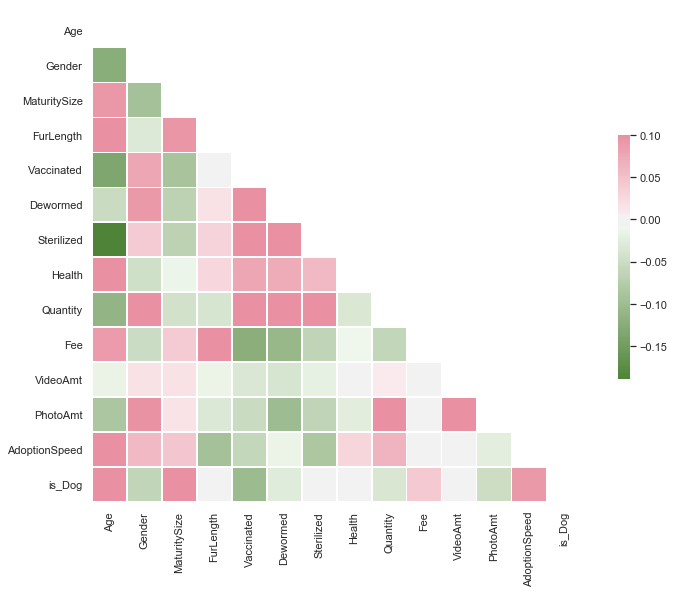

In [17]:
target = train['AdoptionSpeed']
sns.set(style="white")

# Compute the correlation matrix
corr_df = train
corr_df['AdoptionSpeed'] = target
corr = corr_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(13, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(120, 5, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.10, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


#### Check gender's impact 

In [18]:
'''Gender - Gender of pet (1 = Male, 2 = Female, 3 = Mixed, if profile represents group of pets)'''
train['Gender'].value_counts()

2    7277
1    5536
3    2180
Name: Gender, dtype: int64

In [19]:
gendercheck = train[train['Gender']==3]
gendercheck.loc[:'100',['Gender','Quantity']]
gc = gendercheck[gendercheck['Quantity'] == 1]
gc['Gender'].value_counts() 

Series([], Name: Gender, dtype: int64)

#### above check shows that no single pet with gender 3 - better to keep that along with quantity instead of gender.

In [20]:
''' Male or female as a feature and single or group as a another feature'''
train['is_male']= train.Gender.map({1:1,2:0})
train['is_group']= train.Gender.map({3:1})
train=train.fillna({'is_male':0,'is_group':0})

In [21]:
train = train.drop(columns ='Gender', axis = 1)
train.head()

,Age,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,VideoAmt,PhotoAmt,AdoptionSpeed,is_Dog,is_male,is_group
0,3,1,1,2,2,2,1,1,100,0,1.0,2,0,1.0,0.0
1,1,2,2,3,3,3,1,1,0,0,2.0,0,0,1.0,0.0
2,1,2,2,1,1,2,1,1,0,0,7.0,3,1,1.0,0.0
3,4,2,1,1,1,2,1,1,150,0,8.0,2,1,0.0,0.0
4,1,2,1,2,2,2,1,1,0,0,3.0,2,1,1.0,0.0


In [22]:
train.is_group.value_counts()

0.0    12813
1.0     2180
Name: is_group, dtype: int64

In [23]:
'''Vaccinated - Pet has been vaccinated (1 = Yes, 2 = No, 3 = Not Sure)
Dewormed - Pet has been dewormed (1 = Yes, 2 = No, 3 = Not Sure)
Sterilized - Pet has been spayed / neutered (1 = Yes, 2 = No, 3 = Not Sure)'''
print('Vaccinated \n',train['Vaccinated'].value_counts(),'\n')
print('Dewormed \n',train['Dewormed'].value_counts(),'\n')
print('Sterilized \n',train['Sterilized'].value_counts(),'\n')

Vaccinated 
 2    7227
1    5898
3    1868
Name: Vaccinated, dtype: int64 

Dewormed 
 1    8397
2    4815
3    1781
Name: Dewormed, dtype: int64 

Sterilized 
 2    10077
1     3101
3     1815
Name: Sterilized, dtype: int64 



In [24]:
''' Grouping the not sure category as negative for Vaccined, Dewormed, Sterlized'''

train['is_Vaccinated']= train.Vaccinated.map({1:1,2:0,3:0})
train['is_Dewormed']= train.Dewormed.map({1:1,2:0,3:0})
train['is_Sterilized']= train.Sterilized.map({1:1,2:0,3:0})
train.head(5)


print('Vaccinated \n',train['is_Vaccinated'].value_counts(),'\n')
print('Dewormed \n',train['is_Dewormed'].value_counts(),'\n')
print('Sterilized \n',train['is_Sterilized'].value_counts(),'\n')
train.head()

Vaccinated 
 0    9095
1    5898
Name: is_Vaccinated, dtype: int64 

Dewormed 
 1    8397
0    6596
Name: is_Dewormed, dtype: int64 

Sterilized 
 0    11892
1     3101
Name: is_Sterilized, dtype: int64 



,Age,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,VideoAmt,PhotoAmt,AdoptionSpeed,is_Dog,is_male,is_group,is_Vaccinated,is_Dewormed,is_Sterilized
0,3,1,1,2,2,2,1,1,100,0,1.0,2,0,1.0,0.0,0,0,0
1,1,2,2,3,3,3,1,1,0,0,2.0,0,0,1.0,0.0,0,0,0
2,1,2,2,1,1,2,1,1,0,0,7.0,3,1,1.0,0.0,1,1,0
3,4,2,1,1,1,2,1,1,150,0,8.0,2,1,0.0,0.0,1,1,0
4,1,2,1,2,2,2,1,1,0,0,3.0,2,1,1.0,0.0,0,0,0


In [25]:
dropcols = ['Vaccinated','Dewormed','Sterilized']
train =train.drop(dropcols,axis=1)
train.head()

,Age,MaturitySize,FurLength,Health,Quantity,Fee,VideoAmt,PhotoAmt,AdoptionSpeed,is_Dog,is_male,is_group,is_Vaccinated,is_Dewormed,is_Sterilized
0,3,1,1,1,1,100,0,1.0,2,0,1.0,0.0,0,0,0
1,1,2,2,1,1,0,0,2.0,0,0,1.0,0.0,0,0,0
2,1,2,2,1,1,0,0,7.0,3,1,1.0,0.0,1,1,0
3,4,2,1,1,1,150,0,8.0,2,1,0.0,0.0,1,1,0
4,1,2,1,1,1,0,0,3.0,2,1,1.0,0.0,0,0,0


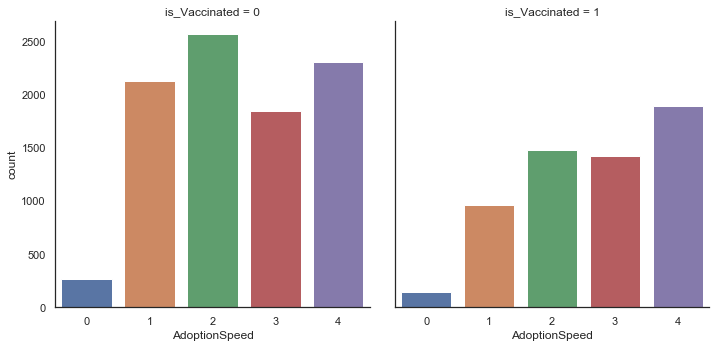

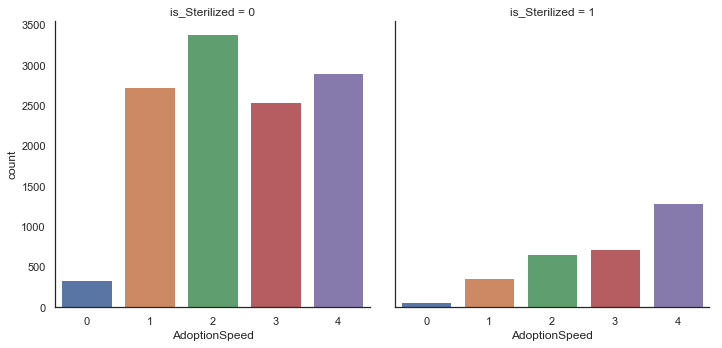

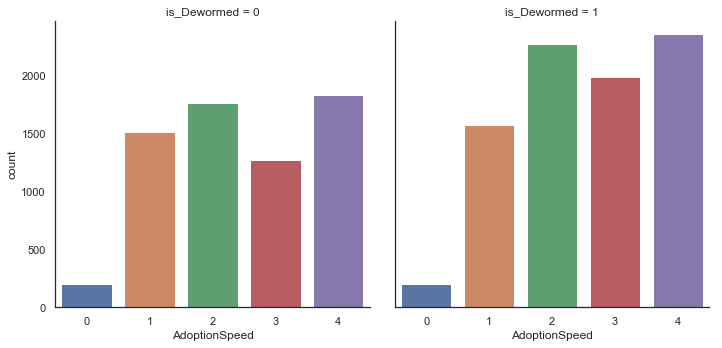

In [26]:
sns.catplot(x='AdoptionSpeed', col='is_Vaccinated', kind='count', data=train)
sns.catplot(x='AdoptionSpeed', col='is_Sterilized', kind='count', data=train)
sns.catplot(x='AdoptionSpeed', col='is_Dewormed', kind='count', data=train)

### There are other categorical variables in the datset  

* Health - Health Condition (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified)
* MaturitySize - Size at maturity (1 = Small, 2 = Medium, 3 = Large, 4 = Extra Large, 0 = Not Specified)
* FurLength - Fur length (1 = Short, 2 = Medium, 3 = Long, 0 = Not Specified)


In [27]:
print(train['Health'].value_counts())
print(train['MaturitySize'].value_counts())
print(train['FurLength'].value_counts())

1    14478
2      481
3       34
Name: Health, dtype: int64
2    10305
1     3395
3     1260
4       33
Name: MaturitySize, dtype: int64
1    8808
2    5361
3     824
Name: FurLength, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001777AA38B00>,
      dtype=object)

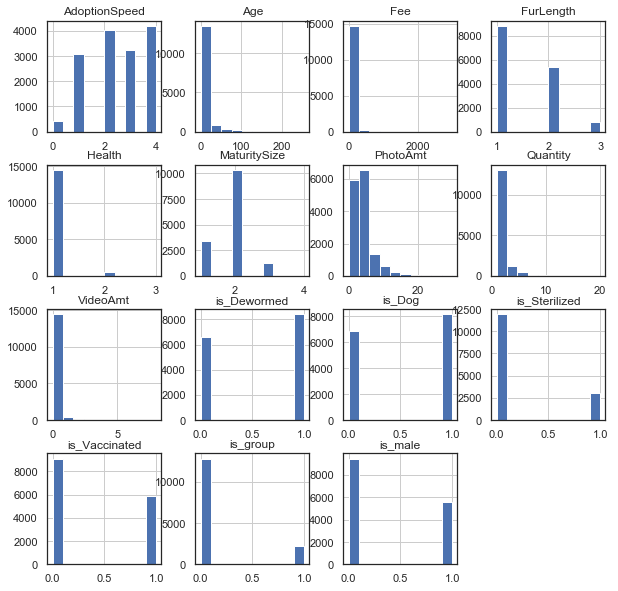

In [28]:
train.hist(figsize=(10,10))

#### Recoding the fursize, maturity, health ordered as per the size category from low to high
##### commented the dummy label for now

In [29]:
'''train_dummyType = pd.get_dummies(train['Health'])
train = pd.concat([train,train_dummyType],axis=1)
train =train.rename(index=str, columns={1: "Healthy",2: "Minor_Injury", 3:"Serious_Injury",0:"Noinfo_Health"})
train = train.drop(columns ='Health', axis = 1)


train_dummyType = pd.get_dummies(train['FurLength'])
train = pd.concat([train,train_dummyType],axis=1)
train =train.rename(index=str, columns={1: "Fur_Short",2: "Fur_Medium", 3:"Fur_Long",0:"Fur_Noinfo"})
train = train.drop(columns ='FurLength', axis = 1)


train_dummyType = pd.get_dummies(train['MaturitySize'])
train = pd.concat([train,train_dummyType],axis=1)
train =train.rename(index=str, columns={1: "Mat_Small",2: "Mat_Medium", 3:"Mat_Large",4:"Mat_ExLarge",0:"Mat_Noinfo"})
train = train.drop(columns ='MaturitySize', axis = 1)


* Health - Health Condition (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified)
* MaturitySize - Size at maturity (1 = Small, 2 = Medium, 3 = Large, 4 = Extra Large, 0 = Not Specified)
* FurLength - Fur length (1 = Short, 2 = Medium, 3 = Long, 0 = Not Specified)
'''
train['Health_recode']= train.Health.map({0:0,3:1,2:2,1:3})
train = train.drop(columns ='Health', axis = 1)
train.head(5)

,Age,MaturitySize,FurLength,Quantity,Fee,VideoAmt,PhotoAmt,AdoptionSpeed,is_Dog,is_male,is_group,is_Vaccinated,is_Dewormed,is_Sterilized,Health_recode
0,3,1,1,1,100,0,1.0,2,0,1.0,0.0,0,0,0,3
1,1,2,2,1,0,0,2.0,0,0,1.0,0.0,0,0,0,3
2,1,2,2,1,0,0,7.0,3,1,1.0,0.0,1,1,0,3
3,4,2,1,1,150,0,8.0,2,1,0.0,0.0,1,1,0,3
4,1,2,1,1,0,0,3.0,2,1,1.0,0.0,0,0,0,3


Text(0, 0.5, 'Quantity')

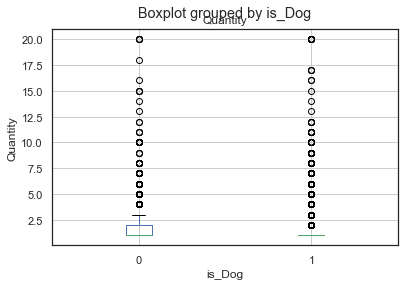

In [30]:
''' Quantity seems to have outliers'''
train.boxplot(column='Quantity', by ='is_Dog') #Mean Age is different per title
plt.ylabel('Quantity')



In [31]:
Check_quantity_gt1 = train_Df[train_Df['Quantity']==20]

In [32]:
''' Quantity seems to be not outliers  or error values, for now we will drop quantity'''
Check_quantity_gt1.head(2)
#train = train.drop(columns ='Quantity', axis = 1)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
263,1,20 Little Puppies,1,307,307,3,1,2,7,3,...,1,20,50,41332,f8ac73e4e6354fca89ef2574d0bc50f5,0,"These are 20 puppies, from 2 stray mums need g...",d78d1dec0,5.0,4
427,2,OMIEY'S HOME,1,266,0,3,2,4,7,2,...,1,20,0,41401,d652d4cedd016063121aea37144fd68b,0,"Hi, kepada sesiapa yang berminat untuk adopt k...",7ee058c3d,5.0,4


### Correlation Matrix

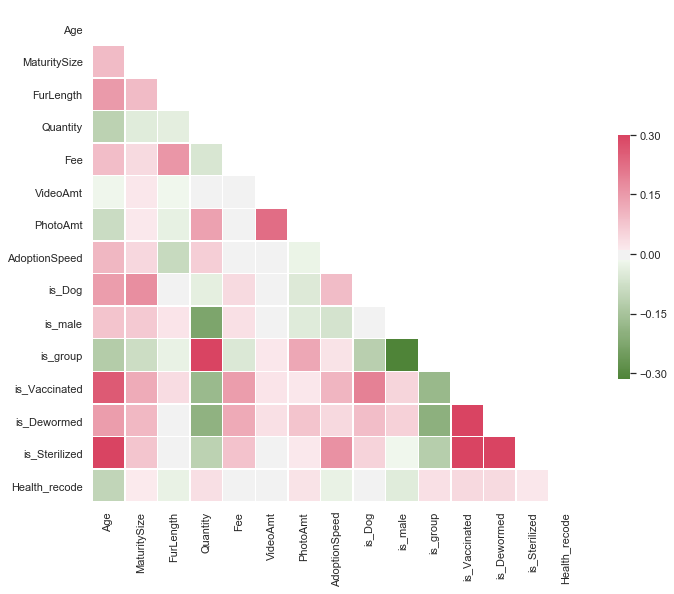

In [33]:
sns.set(style="white")

# Compute the correlation matrix
corr_df = train
corr_df['AdoptionSpeed'] = target
corr = corr_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(13, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(120, 5, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Model Bulding


In [34]:
from sklearn.ensemble import RandomForestClassifier
clean_x_train = train.drop(columns=['AdoptionSpeed'])
clean_x_test = test_Df.drop(columns=['Name', 'RescuerID', 'Description', 'PetID'])
target = train['AdoptionSpeed']


model = RandomForestClassifier()
model.fit(clean_x_train, target)

C:\Users\mvaithianathan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Feature Importance


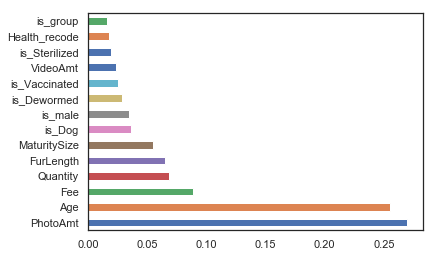

In [35]:
(pd.Series(model.feature_importances_, index=clean_x_train.columns)
   .nlargest(50)
   .plot(kind='barh'))

In [36]:

# Splitting Data into Training and Validation set(75:25)
from sklearn.model_selection import train_test_split
x_train, x_validation, y_train, y_validation = train_test_split(train, target, test_size=0.25, random_state=10)

In [37]:
from sklearn.tree import DecisionTreeClassifier
clf1 = RandomForestClassifier()
clf2 = AdaBoostClassifier()
'''Contrary to AdaBoost, tweaks the instance weights at every interaction
, Gradient Bossting tries to fit the new predictor to the residual errors made by the previous predictor'''
clf3 = xgb.XGBClassifier()
clf4 = DecisionTreeClassifier()

In [38]:
def train_model(clf,X, y, val_x, val_y):
    model = clf
    #t1 = time()
    model.fit(X, y)
    #t2 = round((t1-time()), 3)
    #t3 = time()
    pred = model.predict(val_x)
    #t4 = round((t3-time()), 3)
    score = accuracy_score(pred, val_y)
    ck_score = cohen_kappa_score(pred, val_y)
    cross_score = cross_val_score(clf, X, y, scoring='accuracy', cv = 10)
    
    print("Model : %s" % clf)
    #print("Training Time : %d" % t2)
    #print("Prediction Time : %d" % t4)
    print("Accuracy : %s" % score)
    print("Cohem_Kappa : %s" % ck_score)
    print("Cross_Val_Score : %s" % cross_score.mean())
    

In [39]:
train_model(clf1, x_train, y_train, x_validation, y_validation)

C:\Users\mvaithianathan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Model : RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Accuracy : 0.9909309149106429
Cohem_Kappa : 0.9880269151595733
Cross_Val_Score : 0.9922626237357314


In [40]:
train_model(clf2, x_train, y_train, x_validation, y_validation)

Model : AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)
Accuracy : 0.572952787409976
Cohem_Kappa : 0.41734560430109036
Cross_Val_Score : 0.5777304262190508


In [41]:
train_model(clf3, x_train, y_train, x_validation, y_validation)

Model : XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
Accuracy : 1.0
Cohem_Kappa : 1.0
Cross_Val_Score : 1.0


In [42]:
train_model(clf4, x_train, y_train, x_validation, y_validation)

Model : DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Accuracy : 1.0
Cohem_Kappa : 1.0
Cross_Val_Score : 1.0


### looks  over fitted :(